# Source 1

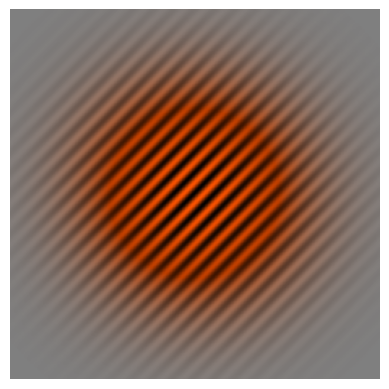

In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def gabor_patch(size, color, lambda_, theta, sigma, phase, trim=.005,
                color_trim=.005, color_std_dev=0):
    X0 = (np.linspace(1, size, size) / size) - .5
    freq = size / float(lambda_)
    phaseRad = (phase / 180.) * np.pi
    Xm, Ym = np.meshgrid(X0, X0)
    thetaRad = (theta / 180.) * np.pi
    Xt = Xm * np.cos(thetaRad)
    Yt = Ym * np.sin(thetaRad)
    grating = np.sin(((Xt + Yt) * freq * 2 * np.pi) + phaseRad)
    gauss = np.exp(-((Xm ** 2) + (Ym ** 2)) / (2 * (sigma / float(size)) ** 2))
    gauss[gauss < trim] = 0
    mask = np.where(gauss < color_trim, True, False)  # where should it be cut?
    color_pixel = color / 360 * 255
    color_std_dev_pixel = color_std_dev / 360 * 255
    v = (1 - (grating * gauss + 1) / 2) * 255
    h = np.ones(v.shape) * color_pixel
    if color_std_dev_pixel > 1e-3:
        h = np.random.normal(h, color_std_dev_pixel)
    s = np.clip(np.ones(v.shape) * gauss * 2, 0, 1) * 255
    h[mask] = 0
    s[mask] = 0
    v[gauss == 0] = 127
    img_data = np.transpose(np.array([h, s, v]), (1, 2, 0))
    img_data = np.uint8(img_data)
    return Image.fromarray(img_data, "HSV").convert("RGB")

# Parámetros de prueba
size = 256
color = 20  # Color en grados (0-360)
lambda_ = 10  # Longitud de onda - sf
theta = 45  # Ángulo de la onda - ori
sigma = 50  # Desviación estándar de la gaussiana
phase = 90  # Fase de la onda

# Llamada a la función para crear el parche Gabor
gabor_image = gabor_patch(size, color, lambda_, theta, sigma, phase)

# Mostrar la imagen generada en el notebook
plt.imshow(gabor_image)
plt.axis('off')  # Ocultar los ejes
plt.show()


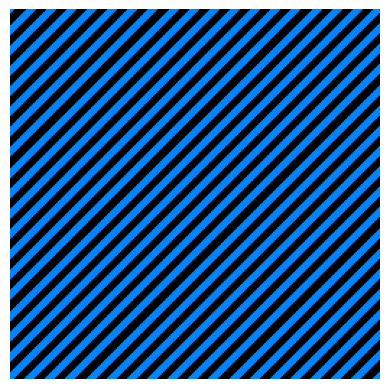

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def gabor_patch(size, color, lambda_, theta, phase, background_color=0):
    X0 = (np.linspace(1, size, size) / size) - .5
    freq = size / float(lambda_)
    phaseRad = (phase / 180.) * np.pi
    Xm, Ym = np.meshgrid(X0, X0)
    thetaRad = (theta / 180.) * np.pi
    Xt = Xm * np.cos(thetaRad)
    Yt = Ym * np.sin(thetaRad)
    
    # Grating: sinusoidal pattern without gaussian modulation
    grating = np.sin(((Xt + Yt) * freq * 2 * np.pi) + phaseRad)
    
    # Binarize the grating pattern (high or low)
    grating_binarized = np.where(grating >= 0, 1, 0)

    # Prepare HSV channels
    h = np.ones(grating_binarized.shape) * (color / 360 * 255)  # Hue for the grating
    s = np.ones(grating_binarized.shape) * 255  # Saturation is full
    v = np.ones(grating_binarized.shape) * 255  # Value (brightness) is full

    # Apply background color to the other regions
    h[grating_binarized == 0] = background_color / 360 * 255
    s[grating_binarized == 0] = 0
    v[grating_binarized == 0] = background_color / 360 * 255

    # Combine channels and convert to an image
    img_data = np.transpose(np.array([h, s, v]), (1, 2, 0))
    img_data = np.uint8(img_data)
    return Image.fromarray(img_data, "HSV").convert("RGB")

# Parámetros de prueba
size = 256
color = 210  # Color en grados (0-360)
lambda_ = 10  # Longitud de onda - sf
theta = 45  # Ángulo de la onda - ori
phase = 90  # Fase de la onda
background_color = 0  # Color del fondo en grados (0-360), 0 para negro

# Llamada a la función para crear el parche Gabor
gabor_image = gabor_patch(size, color, lambda_, theta, phase, background_color=background_color)

# Mostrar la imagen generada en el notebook
plt.imshow(gabor_image)
plt.axis('off')  # Ocultar los ejes
plt.show()


# Source 2

In [19]:
## https://github.com/odedwer/gabor_generator/blob/master/make_gabor.py

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def deg2rad(deg):
    return (deg * np.pi) / 180

def save_gabor_patch_image(frequency, orientation, envelope, size, phase, bg_color, c1, c2, std=None):
    """
    Saves a gabor patch .PNG file with the given properties
    :param frequency: The frequency of the Gabor patch
    :param orientation: The orientation of the Gabor patch in degrees
    :param envelope: The envelope of the Gabor patch. Must be one of the following:
           * gaussian
           * linear
           * sine
           * circular
    :param size: The size in pixels of the image
    :param phase: The phase of the Gabor patch
    :param bg_color: The background color of the image
    :param c1: The first color of the Gabor patch
    :param c2: The second color of the Gabor patch
    :param std: The STD of the gaussian envelope. Only relevant if envelope=="gaussian"
    :return:
    """
    amp, f = generate_gabor_patch(envelope, frequency, orientation, phase, size, std)
    
    # Convertir colores a numpy arrays y expandir dimensiones para el canal de transparencia
    c1 = np.array(c1)
    c2 = np.array(c2)
    
    # Calcular los valores de color para el parche
    im_rgb_vals = (c1 * amp[:, :, None]) + (c2 * (1 - amp[:, :, None]))
    
    # Crear el canal de alfa (transparencia): 1 donde hay el parche, 0 en el fondo
    alpha_channel = f
    
    # Combinar los valores RGB con el canal alfa para crear una imagen RGBA
    im_rgba_vals = np.dstack((im_rgb_vals, alpha_channel))
    
    # Convertir a imagen PIL con canal alfa
    im = Image.fromarray((im_rgba_vals * 255).astype('uint8'), 'RGBA')
    
    # Mostrar la imagen inline en el notebook
    plt.imshow(im)
    plt.axis('off')
    plt.show()
    
    # Generar el string con el codigo de colorpara almacenar parche con nombre
    c1_str = '-'.join(map(str, c1))
    c2_str = '-'.join(map(str, c2))
    
    # Guardar la imagen
    #im.save(f"gabor_patches/gabor#env{envelope}#freq{frequency}#colorA{c1_str}#colorB{c2_str}.png")
    im.save(f"gabor_patches/custom_stim.png")


def generate_gabor_patch(envelope, frequency, orientation, phase, size, std):
    im_range = np.arange(size)
    x, y = np.meshgrid(im_range, im_range)
    dx = x - size // 2
    dy = y - size // 2
    t = np.arctan2(dy, dx) - deg2rad(orientation)
    r = np.sqrt(dx ** 2 + dy ** 2)
    x = r * np.cos(t)
    y = r * np.sin(t)
    
    # Transición brusca para los colores (líneas) en el patrón Gabor
    amp = np.where(np.cos(2 * np.pi * (x * frequency + phase)) >= 0, 1, 0)
    
    if envelope == "gaussian":
        f = np.exp(-0.5 * (std / size) * ((x ** 2) + (y ** 2)))
    elif envelope == "linear":
        f = np.maximum(0, (size // 2 - r) / (size // 2))
    elif envelope == "sine":
        f = np.cos((np.pi * (r + size // 2)) / (size - 1) - np.pi / 2)
        f[r > size // 2] = 0
    elif envelope == "circular":  # Crear un borde bien definido entre el parche y el fondo
        f = np.where(r <= size // 2, 1, 0)
    else:
        raise ValueError("Envelope type is incorrect!")
    
    return amp, f

def generate_gabor_patches(frequency, orientations, envelope, size, phase, bg_color, c1, c2, std, num_orientations):
    if len(orientations) == 2 and num_orientations > 2:
        orientations = np.linspace(orientations[0], orientations[1], num_orientations)
    for orientation in orientations:
        save_gabor_patch_image(frequency, orientation, envelope, size, phase, bg_color, c1, c2, std)


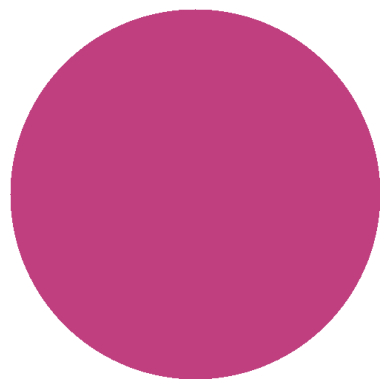

In [11]:

# Parámetros de ejemplo
frequency = 0.1
orientations = [0]  # Puedes pasar una lista de orientaciones o un solo valor
envelope = "circular"  # Usamos la envolvente "circular" para un borde bien definido
size = 500
phase = 0
bg_color = (0.75, 0.25, 0.5)  # Este parámetro ya no se usa para el fondo
c1 = (0.75, 0.25, 0.5)
c2 = (0.75, 0.25, 0.5) #(0.5, 0.70, 0)
std = 20
num_orientations = 1  # Cambia este valor si quieres generar múltiples orientaciones

# Generar y mostrar el parche de Gabor inline
generate_gabor_patches(frequency, orientations, envelope, size, phase, bg_color, c1, c2, std, num_orientations)


# Source 2: clean code

In [2]:
## Useful HSV to RGB converter + normalizer

def hsv_a_rgb(h, s, v):
    """
    Convierte un color desde HSV a RGB.

    Parámetros:
    h (float): Matiz (Hue) en grados (0-360).
    s (float): Saturación (Saturation) como porcentaje (0-100).
    v (float): Valor (Value) como porcentaje (0-100).

    Retorna:
    tuple: Una tupla con valores (R, G, B), cada uno en el rango de 0 a 255.
    """
    h = h % 360
    s /= 100
    v /= 100

    c = v * s
    x = c * (1 - abs((h / 60) % 2 - 1))
    m = v - c

    if 0 <= h < 60:
        r, g, b = c, x, 0
    elif 60 <= h < 120:
        r, g, b = x, c, 0
    elif 120 <= h < 180:
        r, g, b = 0, c, x
    elif 180 <= h < 240:
        r, g, b = 0, x, c
    elif 240 <= h < 300:
        r, g, b = x, 0, c
    else:
        r, g, b = c, 0, x

    r = (r + m) * 255
    g = (g + m) * 255
    b = (b + m) * 255

    return int(round(r)), int(round(g)), int(round(b))


def normalizar_rgb(rgb):
    """
    Normaliza una tupla de valores RGB dividiendo cada componente por 255.

    Parámetros:
    rgb (tuple): Una tupla con valores (R, G, B), cada uno en el rango de 0 a 255.

    Retorna:
    tuple: Una tupla con valores normalizados (R, G, B), cada uno en el rango de 0 a 1.
    """
    return tuple(component / 255 for component in rgb)


# Ejemplo de uso
hsv = (30, 100, 100)
rgb = hsv_a_rgb(*hsv)
rgb_normalizado = normalizar_rgb(rgb)
print(rgb)  # Salida: (255, 128, 0)
print(rgb_normalizado)


(255, 128, 0)
(1.0, 0.5019607843137255, 0.0)


In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def save_gabor_patch_image(frequency, size, c1, c2):
    """
    Saves a gabor patch .PNG file with the given properties
    :param frequency: The frequency of the Gabor patch
    :param size: The size in pixels of the image
    :param c1: The first color of the Gabor patch
    :param c2: The second color of the Gabor patch
    :return:
    """
    amp, f = generate_gabor_patch(frequency, size)
    
    # Convertir colores a numpy arrays y expandir dimensiones para el canal de transparencia
    c1 = np.array(c1)
    c2 = np.array(c2)
    
    # Calcular los valores de color para el parche
    im_rgb_vals = (c1 * amp[:, :, None]) + (c2 * (1 - amp[:, :, None]))
    
    # Crear el canal de alfa (transparencia): 1 donde hay el parche, 0 en el fondo
    alpha_channel = f
    
    # Combinar los valores RGB con el canal alfa para crear una imagen RGBA
    im_rgba_vals = np.dstack((im_rgb_vals, alpha_channel))
    
    # Convertir a imagen PIL con canal alfa
    im = Image.fromarray((im_rgba_vals * 255).astype('uint8'), 'RGBA')
    im.save(f"gabor_patches/custom_stim.png")
    # Mostrar la imagen inline en el notebook
    plt.imshow(im)
    plt.axis('off')
    plt.show()


def generate_gabor_patch(frequency, size):
    im_range = np.arange(size)
    x, y = np.meshgrid(im_range, im_range)
    dx = x - size // 2
    dy = y - size // 2
    t = np.arctan2(dy, dx)
    r = np.sqrt(dx ** 2 + dy ** 2)
    x = r * np.cos(t)
    y = r * np.sin(t)
    
    # Transición brusca para los colores (líneas) en el patrón Gabor
    amp = np.where(np.cos(2 * np.pi * (x * frequency)) >= 0, 1, 0)
    f = np.where(r <= size // 2, 1, 0)
    
    return amp, f


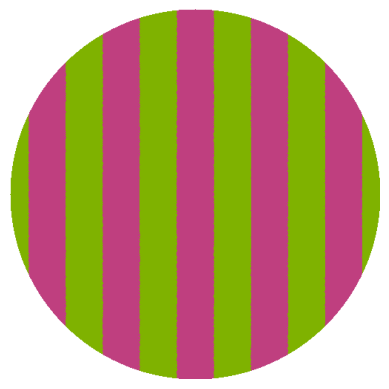

In [19]:

# Parámetros de ejemplo
frequency = 0.01
size = 500
c1 = (0.75, 0.25, 0.5)
c2 = (0.5, 0.70, 0)

# Generar y mostrar el parche de Gabor inline
save_gabor_patch_image(frequency, size, c1, c2)

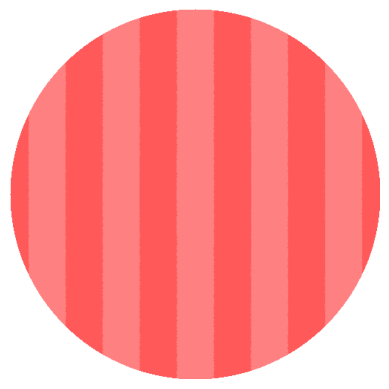

In [10]:

# Ejemplo usando funciones de conversion de color HSV a RGB y normalizacion

frequency = 0.01
size = 500
c1_hsv = (360, 50, 100)
c2_hsv = (360, 65, 100)

# Generar y mostrar el parche de Gabor inline
save_gabor_patch_image(frequency, 
                       size, 
                       normalizar_rgb(hsv_a_rgb(*c1_hsv)), 
                       normalizar_rgb(hsv_a_rgb(*c2_hsv)))

## Color vs Contrast

Al cambiar el color cambia el contraste.

Se alcula la relación de contraste basada en la luminancia relativa de los colores, según las directrices del W3C (World Wide Web Consortium).
Pasos para calcular el contraste entre dos colores RGB:

    1) Convertir el color RGB a su luminancia relativa a través de una fórmula estándar.
    2) Calcular la relación de contraste: la diferencia relativa de luminancia entre el color más claro y el más oscuro.

In [2]:
import colorsys

def rgb_to_hsv_saturation(rgb):
    # Normalizar valores RGB a 0-1
    r, g, b = [v / 255.0 for v in rgb]
    
    # Convertir de RGB a HSV
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    
    # La saturación es el segundo valor que devuelve colorsys.rgb_to_hsv
    return s

def rgb_to_luminance(rgb):
    r, g, b = [v / 255.0 for v in rgb]
    r = r / 12.92 if r <= 0.04045 else ((r + 0.055) / 1.055) ** 2.4
    g = g / 12.92 if g <= 0.04045 else ((g + 0.055) / 1.055) ** 2.4
    b = b / 12.92 if b <= 0.04045 else ((b + 0.055) / 1.055) ** 2.4
    return 0.2126 * r + 0.7152 * g + 0.0722 * b

def contrast_ratio(color1, color2):
    L1 = rgb_to_luminance(color1)
    L2 = rgb_to_luminance(color2)
    
    if L1 > L2:
        return (L1 + 0.05) / (L2 + 0.05)
    else:
        return (L2 + 0.05) / (L1 + 0.05)

# Ejemplo de uso
color1 = (255, 0, 0)  # Rojo
color2 = (0, 255, 0)  # Verde

contraste = contrast_ratio(color1, color2)
print(f"El contraste entre {color1} y {color2} es: {contraste:.2f}")
 
print(f"Saturación de {color1}: {rgb_to_hsv_saturation(color1):.2f}")
print(f"Saturación de {color2}: {rgb_to_hsv_saturation(color2):.2f}")


El contraste entre (255, 0, 0) y (0, 255, 0) es: 2.91
Saturación de (255, 0, 0): 1.00
Saturación de (0, 255, 0): 1.00


Paleta de colores para los parches sugeridos por chatGPT:

Magenta (255, 0, 255) y Rojo (255, 0, 0)
Rojo (255, 0, 0) y Azul (0, 0, 255)
Cian (0, 255, 255) y Verde (0, 255, 0)
Cian (0, 255, 255) y Magenta (255, 0, 255)
Verde (0, 255, 0) y Cian (0, 255, 255)
Rojo (255, 0, 0) y Cian (0, 255, 255)
Cian (0, 255, 255) y Verde (0, 255, 0)
Cian (0, 255, 255) y Rojo (255, 0, 0)
Azul (0, 0, 255) y Amarillo (255, 255, 0)
Cian (0, 255, 255) y Amarillo (255, 255, 0)
Verde (0, 255, 0) y Azul (0, 0, 255)
Rojo (255, 0, 0) y Azul (0, 0, 255)
Rojo (255, 0, 0) y Verde (0, 255, 0)
Cian (0, 255, 255) y Azul (0, 0, 255)
Rojo (255, 0, 0) y Amarillo (255, 255, 0)

El contraste entre (255, 0, 0) y (0, 255, 0) es: 2.91
Saturación de (255, 0, 0): 1.00
Saturación de (0, 255, 0): 1.00


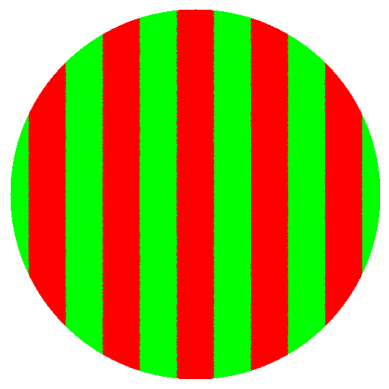

In [5]:
# Test A: Rojo y verde

# Config. color
color1 = (255, 0, 0)  # Rojo
color2 = (0, 255, 0)  # Verde

contraste = contrast_ratio(color1, color2)
print(f"El contraste entre {color1} y {color2} es: {contraste:.2f}")
print(f"Saturación de {color1}: {rgb_to_hsv_saturation(color1):.2f}")
print(f"Saturación de {color2}: {rgb_to_hsv_saturation(color2):.2f}")

# Parche
frequency = 0.01
size = 500

save_gabor_patch_image(frequency, size, 
                       (color1[0]/255, color1[1]/255, color1[2]/255), 
                       (color2[0]/255, color2[1]/255, color2[2]/255))


El contraste entre (255, 0, 0) y (0, 0, 255) es: 2.15
Saturación de (255, 0, 0): 1.00
Saturación de (0, 0, 255): 1.00


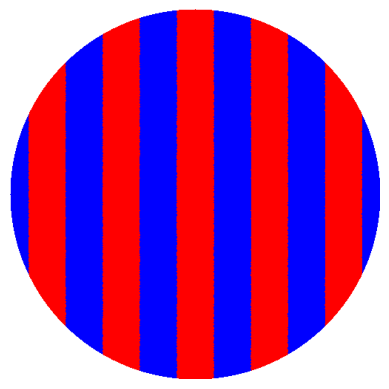

In [7]:
# Test B: rojo y azul

# Config. color
color1 = (255, 0, 0)  # Rojo
color2 = (0, 0, 255)  # Azul

contraste = contrast_ratio(color1, color2)
print(f"El contraste entre {color1} y {color2} es: {contraste:.2f}")
print(f"Saturación de {color1}: {rgb_to_hsv_saturation(color1):.2f}")
print(f"Saturación de {color2}: {rgb_to_hsv_saturation(color2):.2f}")

# Parche
frequency = 0.01
size = 500

save_gabor_patch_image(frequency, size, 
                       (color1[0]/255, color1[1]/255, color1[2]/255), 
                       (color2[0]/255, color2[1]/255, color2[2]/255))

El contraste entre (255, 0, 255) y (255, 0, 0) es: 1.27
Saturación de (255, 0, 255): 1.00
Saturación de (255, 0, 0): 1.00


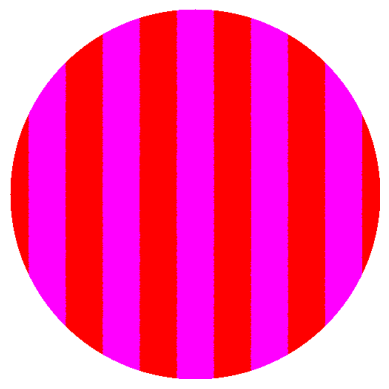

In [8]:
# Test C: magenta y rojo

# Config. color
color1 = (255, 0, 255)  # Rojo
color2 = (255, 0, 0)  # Azul

contraste = contrast_ratio(color1, color2)
print(f"El contraste entre {color1} y {color2} es: {contraste:.2f}")
print(f"Saturación de {color1}: {rgb_to_hsv_saturation(color1):.2f}")
print(f"Saturación de {color2}: {rgb_to_hsv_saturation(color2):.2f}")

# Parche
frequency = 0.01
size = 500

save_gabor_patch_image(frequency, size, 
                       (color1[0]/255, color1[1]/255, color1[2]/255), 
                       (color2[0]/255, color2[1]/255, color2[2]/255))

El contraste entre (255, 180, 180) y (255, 180, 255) es: 1.06
Saturación de (255, 180, 180): 0.29
Saturación de (255, 180, 255): 0.29


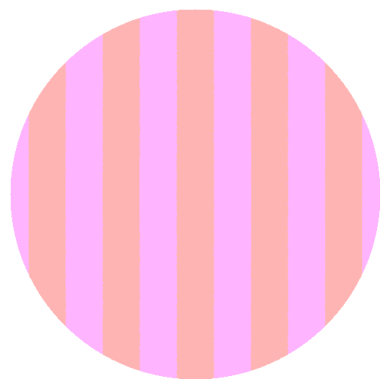

In [11]:
# Config. color
color1 = (255, 180, 180)  
color2 = (255, 180, 255)  

contraste = contrast_ratio(color1, color2)
print(f"El contraste entre {color1} y {color2} es: {contraste:.2f}")
print(f"Saturación de {color1}: {rgb_to_hsv_saturation(color1):.2f}")
print(f"Saturación de {color2}: {rgb_to_hsv_saturation(color2):.2f}")

# Parche
frequency = 0.01
size = 500

save_gabor_patch_image(frequency, size, 
                       (color1[0]/255, color1[1]/255, color1[2]/255), 
                       (color2[0]/255, color2[1]/255, color2[2]/255))